<a href="https://colab.research.google.com/github/reddykushal7781/Weather_Prediction/blob/main/LogReg_AusWeatherData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia

#### To perform logistic regression on the Australian weather data
To predict a binary outcome such as "RainTomorrow"(weather it will rain tomorrow)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

# import necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
path = "/content/drive/MyDrive/python/class 04/weatherAUS.csv"
data = pd.read_csv(path)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
path = "/content/drive/MyDrive/python/class 04/weatherAUS.csv"
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.shape

(145460, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


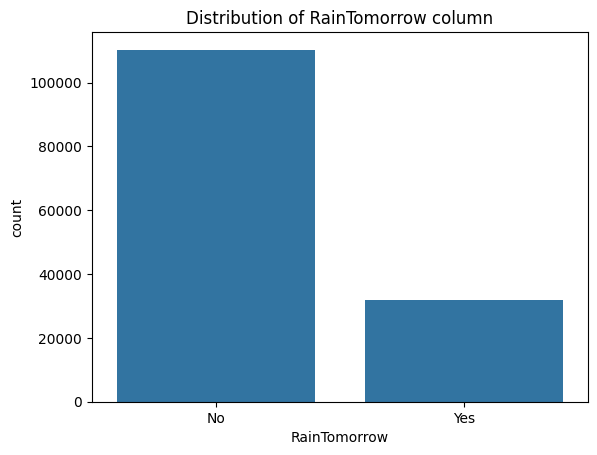

In [ ]:
# distribution of 'RainTomorrow'

sns.countplot(x = 'RainTomorrow', data = data)
plt.title("Distribution of RainTomorrow column")
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
corr = data.select_dtypes(include = 'number').corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


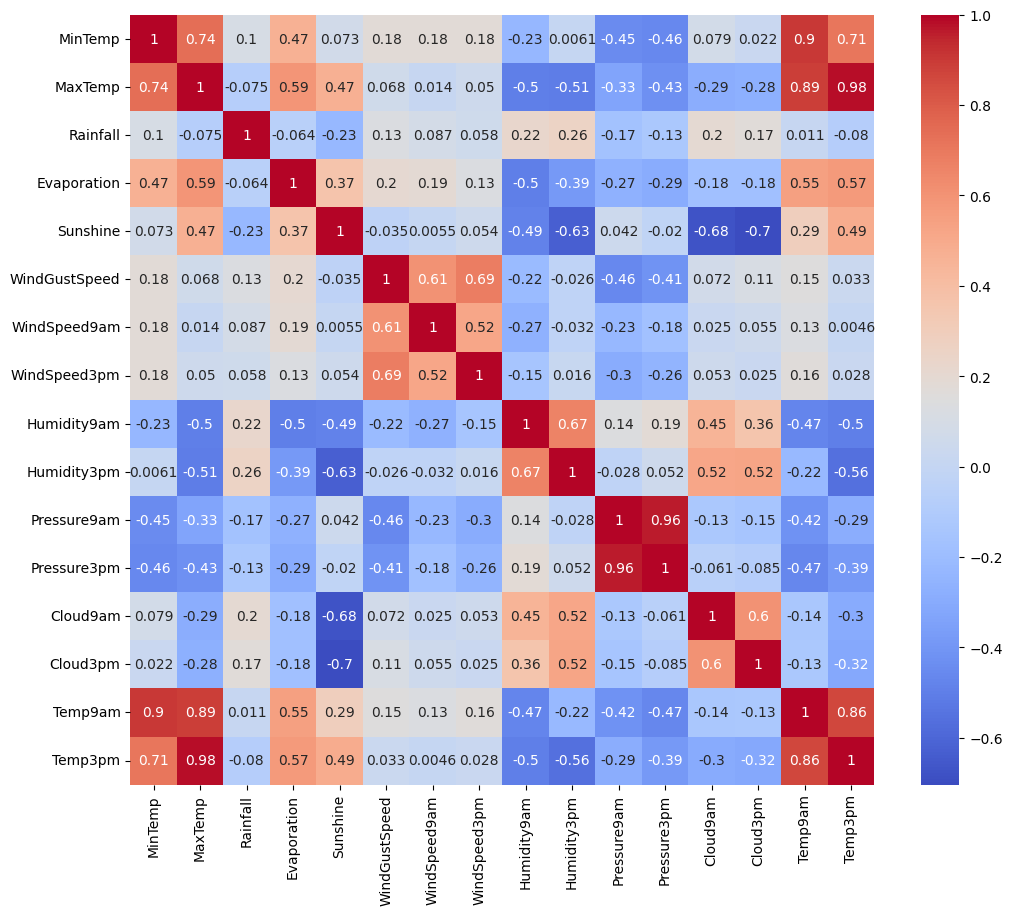

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# any column having more than 50,000 rows missing we shall drop it

data = data.dropna(thresh = 50000, axis = 1)


In [ ]:
# handling the missing values in numerical columns using median
numerical_colmns = data.select_dtypes(include = 'number').columns
for col in numerical_colmns:
    data[col] = data[col].fillna(data[col].median())

In [ ]:
data.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566


In [ ]:
# let us see what are the missing values in categorical columns
missing_values = data.loc[:,data.isnull().sum() > 0]
for col in missing_values.columns:
    print(f'{col}:{missing_values[col].isnull().sum()}')
    print(missing_values[col].unique())

WindGustDir:10326
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am:10566
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm:4228
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday:3261
['No' 'Yes' nan]
RainTomorrow:3267
['No' 'Yes' nan]


In [ ]:
categorical_columns = ['WindGustDir','WindDir9am','WindDir3pm','RainToday', 'RainTomorrow']
for col in categorical_columns:
    data.loc[data[col].isnull(),col] = np.random.choice(data[col].dropna().unique())

In [ ]:
data.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
data.shape

(145460, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [ ]:
# Handling the Date column
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(['Date'], axis = 1, inplace = True)

In [ ]:
data.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3


In [ ]:
data.shape

(145460, 25)

In [ ]:
data.drop_duplicates(inplace = True) # there are no duplicate rows

In [ ]:
data.shape

(145460, 25)

In [ ]:
# convert the Categorical columns to numeric

Object_columns = data.select_dtypes(include = 'object').columns
data[Object_columns] = data[Object_columns].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Location       145460 non-null  category
 1   MinTemp        145460 non-null  float64 
 2   MaxTemp        145460 non-null  float64 
 3   Rainfall       145460 non-null  float64 
 4   Evaporation    145460 non-null  float64 
 5   Sunshine       145460 non-null  float64 
 6   WindGustDir    145460 non-null  category
 7   WindGustSpeed  145460 non-null  float64 
 8   WindDir9am     145460 non-null  category
 9   WindDir3pm     145460 non-null  category
 10  WindSpeed9am   145460 non-null  float64 
 11  WindSpeed3pm   145460 non-null  float64 
 12  Humidity9am    145460 non-null  float64 
 13  Humidity3pm    145460 non-null  float64 
 14  Pressure9am    145460 non-null  float64 
 15  Pressure3pm    145460 non-null  float64 
 16  Cloud9am       145460 non-null  float64 
 17  Cloud3pm  

In [ ]:
cat_columns = data.select_dtypes(include = 'category').columns
for col in cat_columns:
    data[col] = data[col].cat.codes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int8   
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int8   
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int8   
 9   WindDir3pm     145460 non-null  int8   
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [ ]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [ ]:
data.RainTomorrow.value_counts()

,count
RainTomorrow,
0,113583
1,31877


In [ ]:
data.RainToday.value_counts()

,count
RainToday,
0,110319
1,35141


In [ ]:
data.WindDir3pm.value_counts()

,count
WindDir3pm,
6,12098
9,10838
13,10110
8,9926
15,9518
10,9399
12,9354
3,8890
14,8874


In [ ]:
data.WindDir9am.value_counts()

,count
WindDir9am,
10,19678
3,11758
9,9287
0,9176
7,8749
8,8659
13,8459
12,8423
5,8129


In [ ]:
data.Location.value_counts()

,count
Location,
9,3436
37,3344
13,3193
18,3193
7,3193
0,3193
31,3193
15,3193
1,3040


In [ ]:
data.shape

(145460, 25)

In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
# Define the list of columns for outlier handling and visualization
varlist = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
           'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
           'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
           'Cloud3pm', 'Temp9am', 'Temp3pm']
varlist = [col for col in varlist if data[col].dtype in ['float64', 'int64']]

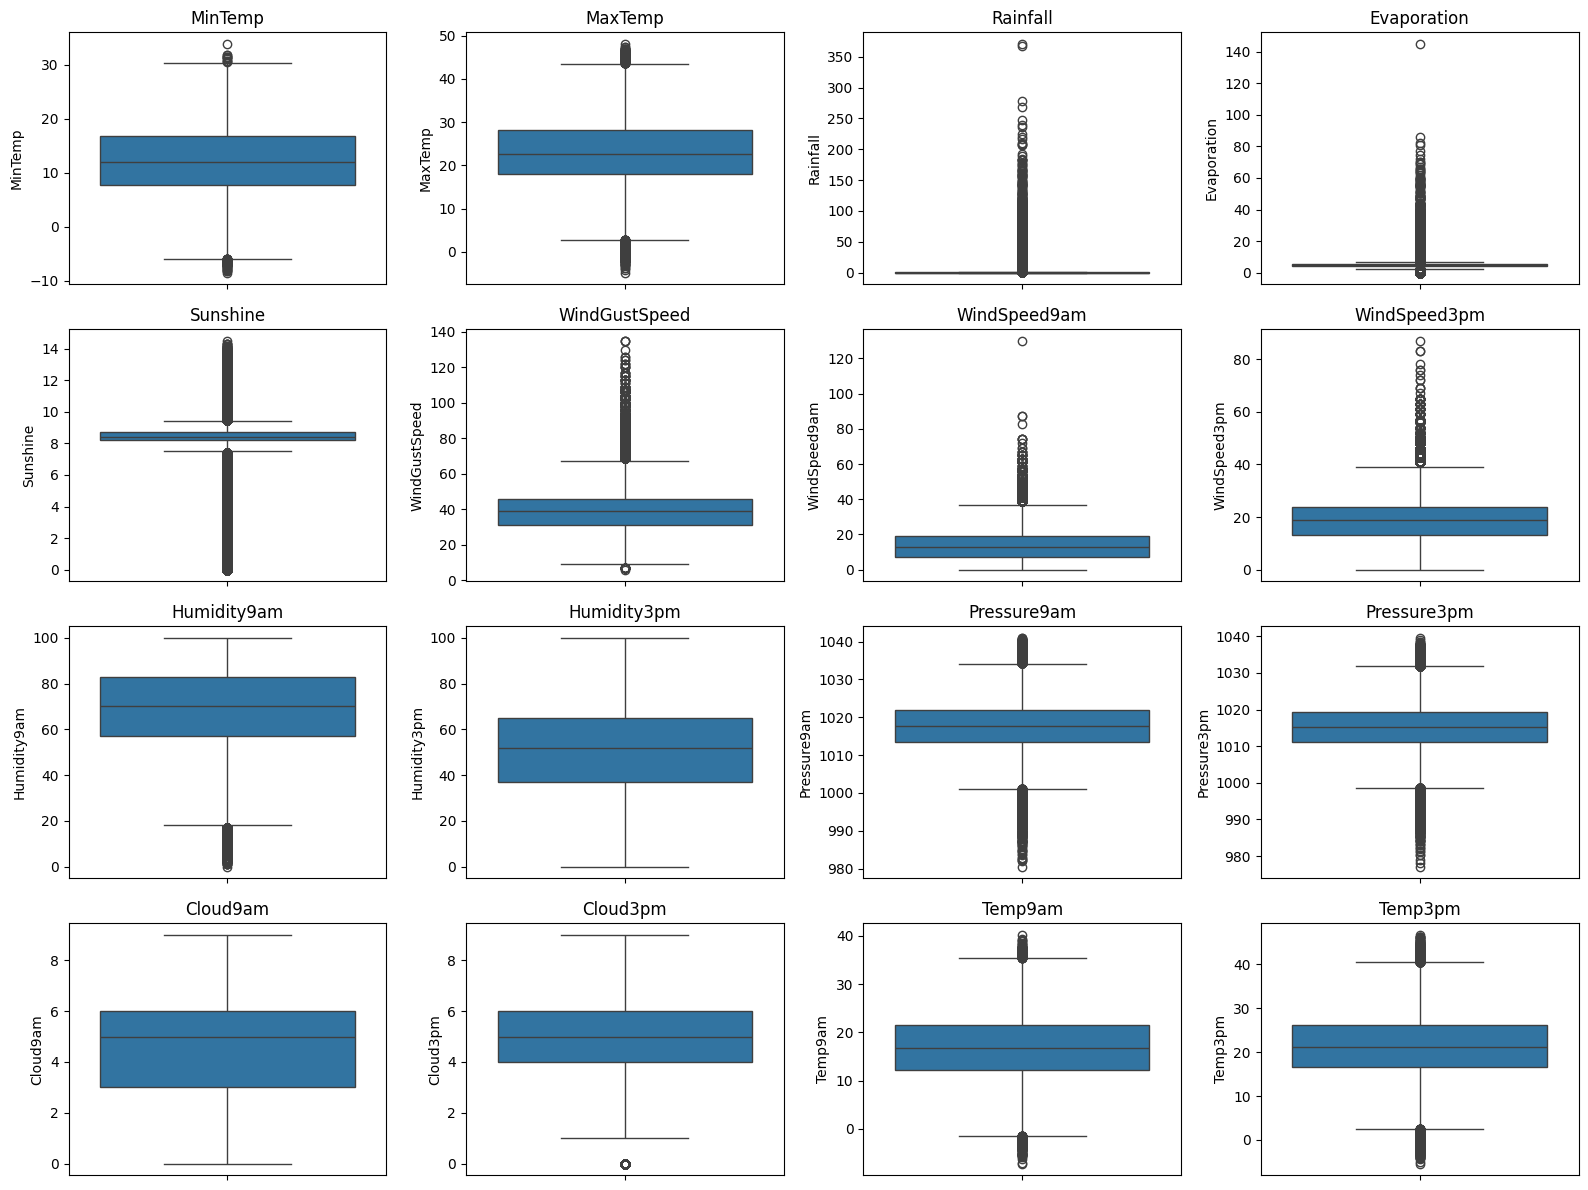

In [ ]:
plt.figure(figsize=(16, 12))
for i, varlist in enumerate(varlist, 1):
    plt.subplot(4, 4, i)  # Creating a 4x4 grid of subplots
    sns.boxplot(y=data[varlist])
    plt.title(varlist)
plt.tight_layout()
plt.show()

In [ ]:
varlist = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

# Function to handle outliers for specified columns
def handle_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with bounds
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data


In [ ]:
# Boxplot function to visualize outliers
def plot_boxplots(data, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(5, 5, i)  # Creating a 4x4 grid of subplots
        sns.boxplot(y=data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

In [ ]:
# Apply the outlier handling function
data = handle_outliers(data, varlist)

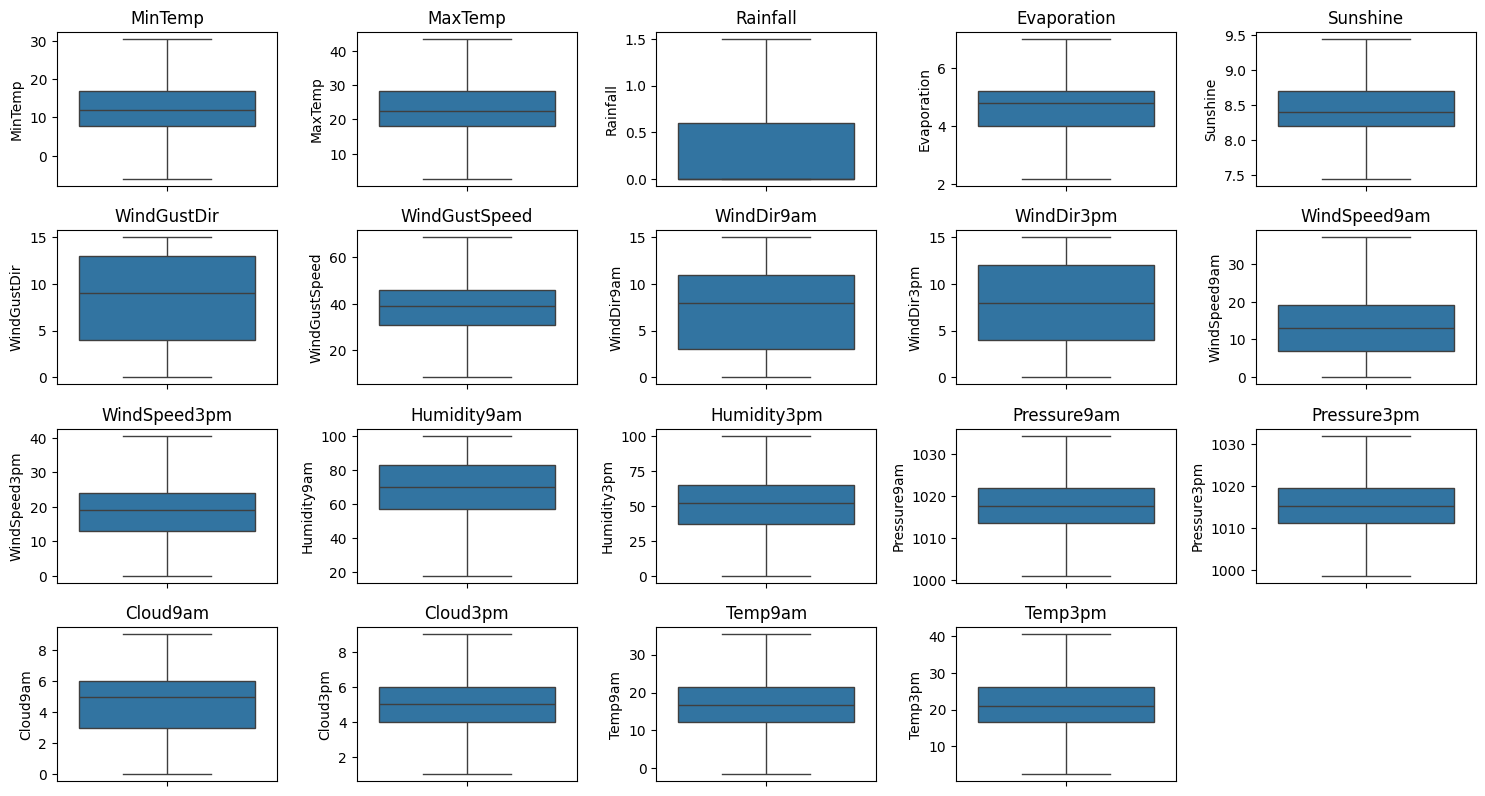

In [ ]:
# Plot boxplots to visualize outliers
plot_boxplots(data, varlist)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,23.793524,14.228687,0.00,11.0,24.0,36.0,48.00
MinTemp,145460.0,12.192336,6.364499,-5.95,7.7,12.0,16.8,30.45
MaxTemp,145460.0,23.219758,7.067804,2.70,18.0,22.6,28.2,43.50
Rainfall,145460.0,0.381674,0.608638,0.00,0.0,0.0,0.6,1.50
Evaporation,145460.0,4.750932,1.454089,2.20,4.0,4.8,5.2,7.00
Sunshine,145460.0,8.422820,0.676532,7.45,8.2,8.4,8.7,9.45
WindGustDir,145460.0,8.164588,4.774643,0.00,4.0,9.0,13.0,15.00
WindGustSpeed,145460.0,39.643280,12.175910,8.50,31.0,39.0,46.0,68.50
WindDir9am,145460.0,7.507995,4.430155,0.00,3.0,8.0,11.0,15.00
WindDir3pm,145460.0,7.711653,4.543037,0.00,4.0,8.0,12.0,15.00


In [ ]:
data.shape

(145460, 25)

In [ ]:
data.RainTomorrow.value_counts()

,count
RainTomorrow,
0,113583
1,31877


In [ ]:
### Checking the % of Yes that it will RainTomorrow
Rain = (sum(data['RainTomorrow']) / len(data['RainTomorrow'].index)) * 100
Rain

# We have almost 22% of chance that it will rain tomorrow in Australia

21.914615701911178

In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('RainTomorrow', axis =1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = scaler.fit_transform(X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
111548,1,0.362017,-0.766740,1.837898,0.034028,-0.033479,14.0,-0.052477,10.0,6.0,-1.629688,0.049274,1.338785,0.021263,0.978595,1.106839,1.462765,0.126460,-0.122588,-0.083943,1,2017,4,24
142528,16,1.948551,2.304152,-0.626773,1.549375,-0.033479,9.0,-0.709040,3.0,7.0,-0.578168,-0.187411,-0.908622,-1.493970,-0.891379,-1.324440,-1.166662,-0.364316,2.035493,2.572559,0,2013,10,11
65304,19,0.393434,0.478598,-0.298150,-1.068043,-0.625216,10.0,-0.791110,12.0,8.0,-0.811839,-0.897469,0.964217,0.265655,0.081616,0.021174,1.024527,-0.855092,0.048195,0.415068,0,2012,2,18
40651,45,0.958931,0.478598,-0.626773,0.034028,-0.033479,9.0,-0.955251,15.0,10.0,-0.344497,0.404303,0.536140,0.754440,-0.100821,0.189375,0.586289,0.126460,0.933164,0.547159,0,2012,2,18
97487,0,-0.124938,-0.554466,0.359095,-1.619078,0.706191,13.0,-0.709040,12.0,11.0,-0.110826,0.049274,-0.320015,-0.223130,0.142428,0.281122,0.148051,0.126460,-0.402052,-0.494894,0,2011,10,11


In [ ]:
X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = scaler.transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
111548,1,0.362017,-0.766740,1.837898,0.034028,-0.033479,14.0,-0.052477,10.0,6.0,-1.629688,0.049274,1.338785,0.021263,0.978595,1.106839,1.462765,0.126460,-0.122588,-0.083943,1,2017,4,24
142528,16,1.948551,2.304152,-0.626773,1.549375,-0.033479,9.0,-0.709040,3.0,7.0,-0.578168,-0.187411,-0.908622,-1.493970,-0.891379,-1.324440,-1.166662,-0.364316,2.035493,2.572559,0,2013,10,11
65304,19,0.393434,0.478598,-0.298150,-1.068043,-0.625216,10.0,-0.791110,12.0,8.0,-0.811839,-0.897469,0.964217,0.265655,0.081616,0.021174,1.024527,-0.855092,0.048195,0.415068,0,2012,2,18
40651,45,0.958931,0.478598,-0.626773,0.034028,-0.033479,9.0,-0.955251,15.0,10.0,-0.344497,0.404303,0.536140,0.754440,-0.100821,0.189375,0.586289,0.126460,0.933164,0.547159,0,2012,2,18
97487,0,-0.124938,-0.554466,0.359095,-1.619078,0.706191,13.0,-0.709040,12.0,11.0,-0.110826,0.049274,-0.320015,-0.223130,0.142428,0.281122,0.148051,0.126460,-0.402052,-0.494894,0,2011,10,11


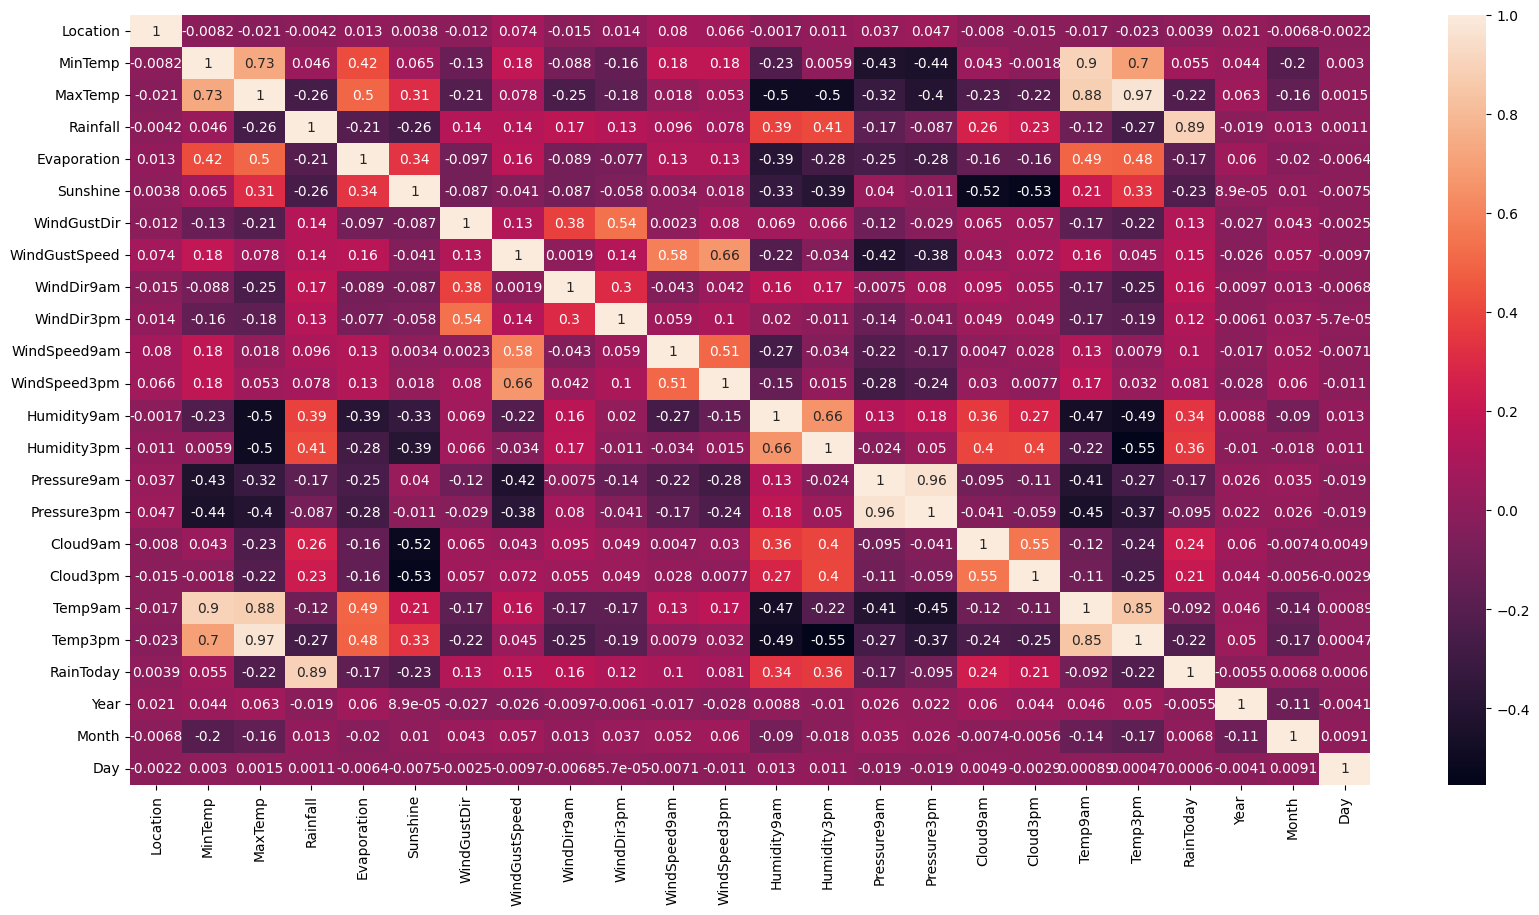

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [ ]:
# Model 1 with all columns in X_train
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116343
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41868.
Date:                Fri, 08 Nov 2024   Deviance:                       83736.
Time:                        11:18:03   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2819
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.3024      7.079     -1.597      0.110     -25.177       2.572
Location         -0.0013      0.001     -2.062      0.039      -0.003   -6.43e-05
MinTemp           0.0292      0.028      1.057      0.290      -0.025       0.083
MaxTemp          -0.2858      0.037     -7.720      0.000      -0.358      -0.213
Rainfall          0.2924      0.019     15.750      0.000       0.256       0.329
Evaporation      -0.0182      0.011     -1.689      0.091      -0.039       0.003
Sunshine         -0.3278      0.012    -27.688      0.000      -0.351      -0.305
WindGustDir       0.0072      0.002      3.080      0.002       0.003       0.012
WindGustSpeed     0.6702      0.013     51.641      0.000       0.645       0.696
WindDir9am       -0.0107      0.002     -4.611      0.000      -0.015      -0.006
WindDir3pm        0.0051      0.002      2.034      0.042       0.000       0.010
WindSpeed9am     -0.1031      0.012     -8.799      0.000      -0.126      -0.080
WindSpeed3pm     -0.2077      0.012    -17.889      0.000      -0.230      -0.185
Humidity9am       0.0255      0.017      1.481      0.139      -0.008       0.059
Humidity3pm       1.1072      0.019     58.789      0.000       1.070       1.144
Pressure9am       0.8131      0.036     22.481      0.000       0.742       0.884
Pressure3pm      -1.2117      0.036    -34.010      0.000      -1.282      -1.142
Cloud9am          0.0240      0.012      1.960      0.050    3.41e-06       0.048
Cloud3pm          0.2765      0.012     22.812      0.000       0.253       0.300
Temp9am           0.0928      0.039      2.383      0.017       0.016       0.169
Temp3pm           0.2232      0.038      5.949      0.000       0.150       0.297
RainToday        -0.0121      0.042     -0.292      0.770      -0.094       0.069
Year              0.0046      0.004      1.321      0.187      -0.002       0.012
Month             0.0127      0.003      4.659      0.000       0.007       0.018
Day               0.0003      0.001      0.260      0.795      -0.002       0.002
=================================================================================
"""

In [ ]:
# Model 2 with RFE technique to get out best explanatory columns or variables

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter = 100)
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
print("Selected features:", X_train.columns[rfe.support_])

Selected features: Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object')


In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Location', False, 7),
 ('MinTemp', False, 2),
 ('MaxTemp', True, 1),
 ('Rainfall', True, 1),
 ('Evaporation', True, 1),
 ('Sunshine', True, 1),
 ('WindGustDir', False, 5),
 ('WindGustSpeed', True, 1),
 ('WindDir9am', False, 9),
 ('WindDir3pm', False, 6),
 ('WindSpeed9am', True, 1),
 ('WindSpeed3pm', True, 1),
 ('Humidity9am', True, 1),
 ('Humidity3pm', True, 1),
 ('Pressure9am', True, 1),
 ('Pressure3pm', True, 1),
 ('Cloud9am', True, 1),
 ('Cloud3pm', True, 1),
 ('Temp9am', True, 1),
 ('Temp3pm', True, 1),
 ('RainToday', False, 4),
 ('Year', False, 8),
 ('Month', False, 3),
 ('Day', False, 10)]

In [ ]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Location', 'MinTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116352
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41898.
Date:                Fri, 08 Nov 2024   Deviance:                       83796.
Time:                        11:18:18   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2815
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8823      0.011   -170.932

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
111548,0.187490
142528,0.037077
65304,0.129531
40651,0.110711
97487,0.052707
103132,0.218684
2551,0.034836
71662,0.017711
133371,0.050161
95882,0.827994


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18749003, 0.03707665, 0.12953126, 0.1107115 , 0.05270743,
       0.21868383, 0.03483579, 0.0177108 , 0.05016142, 0.82799366])

In [ ]:
##### Creating a dataframe with the actual  flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'RainTomorrow': y_train.values, 'RainTomorrow_Prob': y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,RainTomorrow,RainTomorrow_Prob,ID
0,1,0.187490,111548
1,0,0.037077,142528
2,0,0.129531,65304
3,0,0.110711,40651
4,0,0.052707,97487


In [ ]:
##### Creating new column 'predicted' with 1 if RainTomorrow_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,RainTomorrow,RainTomorrow_Prob,ID,Predicted
0,1,0.187490,111548,0
1,0,0.037077,142528,0
2,0,0.129531,65304,0
3,0,0.110711,40651,0
4,0,0.052707,97487,0


In [ ]:
# Confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted)
print(confusion)

[[85953  4958]
 [13176 12281]]


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))

0.8441667812457033


In [ ]:
#### Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,Temp3pm,22.08
0,MaxTemp,21.86
9,Pressure9am,16.82
10,Pressure3pm,16.54
13,Temp9am,10.95
8,Humidity3pm,4.95
7,Humidity9am,3.43
4,WindGustSpeed,2.45
6,WindSpeed3pm,1.94
3,Sunshine,1.75


In [ ]:
# Dropping column which has high VIFs

col = col.drop(['Temp3pm'], 1)
col

Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am'],
      dtype='object')

In [ ]:
#Model 3 # Re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116353
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41912.
Date:                Fri, 08 Nov 2024   Deviance:                       83825.
Time:                        11:18:23   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2813
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8835      0.011   -170.897

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Pressure9am,16.36
10,Pressure3pm,16.15
0,MaxTemp,10.92
13,Temp9am,9.74
8,Humidity3pm,3.90
7,Humidity9am,3.14
4,WindGustSpeed,2.44
6,WindSpeed3pm,1.94
3,Sunshine,1.74
5,WindSpeed9am,1.73


In [ ]:
# Model 4: Dropping the column with high VIF and p-value MinTemp

col = col.drop(['Pressure9am'], 1)
col

Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116354
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42243.
Date:                Fri, 08 Nov 2024   Deviance:                       84486.
Time:                        11:18:27   Pearson chi2:                 1.14e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2772
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8796      0.011   -171.095

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,MaxTemp,10.41
12,Temp9am,9.46
8,Humidity3pm,3.89
7,Humidity9am,3.14
4,WindGustSpeed,2.42
6,WindSpeed3pm,1.94
3,Sunshine,1.74
5,WindSpeed9am,1.72
11,Cloud3pm,1.72
10,Cloud9am,1.71


In [ ]:
# Model 5: Dropping the column with high VIF and p-value MinTemp

col = col.drop(['MaxTemp'], 1)
col

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116355
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42243.
Date:                Fri, 08 Nov 2024   Deviance:                       84486.
Time:                        11:18:29   Pearson chi2:                 1.14e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2772
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8798      0.011   -171.664

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range (X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,Humidity9am,2.68
3,WindGustSpeed,2.41
7,Humidity3pm,2.15
5,WindSpeed3pm,1.91
11,Temp9am,1.83
2,Sunshine,1.74
10,Cloud3pm,1.71
4,WindSpeed9am,1.70
9,Cloud9am,1.70
1,Evaporation,1.51


In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['RainTomorrow_Prob'] = y_train_pred

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))

0.8431097896328887


In [ ]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted)
print(confusion)

[[85920  4991]
 [13266 12191]]


## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("sensitivity =",  TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ", TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive rate =", FP/float(TN+FP))

# positive predictive value
print("Positive predicted rate =", TP/float(TP+FP))

# Negative predictive value
print ("Negative predicted Rate =", TN / float(TN+ FN))

sensitivity = 0.4788859645677024
specificity =  0.9451001528967892
False positive rate = 0.05489984710321083
Positive predicted rate = 0.709521592364102
Negative predicted Rate = 0.8662512854636744


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
# Plot the ROC Curve
def draw_roc(actual, probs):
  fpr, tpr , thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize = (5,5))
  plt.plot(fpr, tpr, label = "ROC Curve(area = %0.2f)" % auc_score)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate or [1- True negative rate]")
  plt.ylabel("True positive rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc = "lower right")
  plt.show()
  return

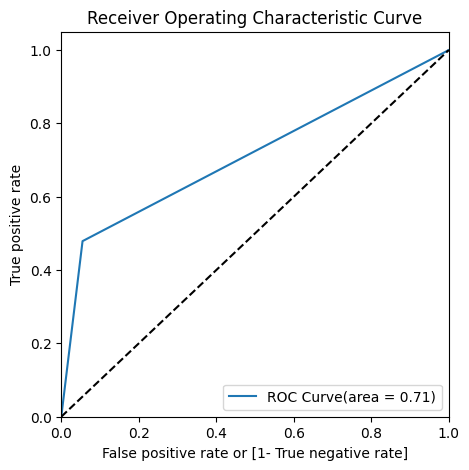

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted, drop_intermediate = False)
draw_roc(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# finding the optimal cut off point

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,RainTomorrow,RainTomorrow_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.163953,111548,0,0,0,0,0,0,0,0,0,0,0
1,0,0.030963,142528,0,0,0,0,0,0,0,0,0,0,0
2,0,0.140845,65304,0,0,0,0,0,0,0,0,0,0,0
3,0,0.139121,40651,0,0,0,0,0,0,0,0,0,0,0
4,0,0.059029,97487,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['Prob', 'Accuracy','Sensitivity', 'Specificity'])
from sklearn.metrics import confusion_matrix


# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# List of probability cutoffs to evaluate
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Create binary predictions based on the cutoff
    y_train_pred_final['Predicted_Label'] = y_train_pred_final['RainTomorrow_Prob'].apply(lambda x: 1 if x >= i else 0)

# Compute the confusion matrix
    cm1 = confusion_matrix(y_train_pred_final['RainTomorrow'], y_train_pred_final['Predicted_Label'])

# Calculate accuracy, sensitivity, and specificity
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0,0] + cm1[1,1]) / total1
    Specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    Sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])

# Store the results in the DataFrame
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.218763     1.000000     0.000000
0.1   0.1  0.639626     0.910791     0.563694
0.2   0.2  0.767170     0.786110     0.761866
0.3   0.3  0.816350     0.675767     0.855716
0.4   0.4  0.837524     0.578426     0.910077
0.5   0.5  0.843110     0.478886     0.945100
0.6   0.6  0.839776     0.382213     0.967903
0.7   0.7  0.829756     0.280041     0.983687
0.8   0.8  0.813746     0.171112     0.993697
0.9   0.9  0.793414     0.059591     0.998900


<function matplotlib.pyplot.show(close=None, block=None)>

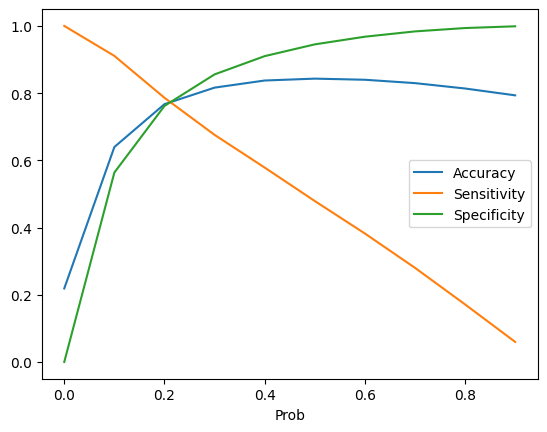

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.RainTomorrow_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,RainTomorrow,RainTomorrow_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Label,final_predicted
0,1,0.163953,111548,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.030963,142528,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.140845,65304,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.139121,40651,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.059029,97487,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted)

0.7671696686374261

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted )
confusion2

array([[69262, 21649],
       [ 5445, 20012]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7861099108300271

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7618660008139829

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2381339991860171


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.48035332805261516


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9271152636299141


In [ ]:
# Preciosin and Recall
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted )
confusion

array([[85920,  4991],
       [13266, 12191]])

In [ ]:
print("Precision =", confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision = 0.709521592364102


In [ ]:
print("Recall =", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall = 0.4788859645677024


In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision =", precision_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))
print("Recall =", recall_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))

Precision = 0.709521592364102
Recall = 0.4788859645677024


  ### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.RainTomorrow[:10], y_train_pred_final.Predicted[:10]


(0    1
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    1
 Name: RainTomorrow, dtype: int8,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    1
 Name: Predicted, dtype: int64)

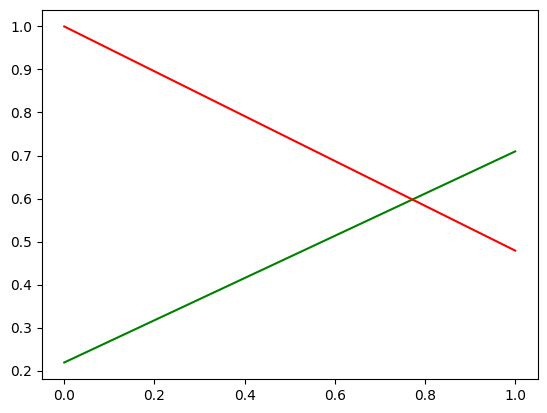

In [ ]:
p , r , thresholds = precision_recall_curve(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

### Making predictions on the test set


In [ ]:
# test the data with y_test and X_test


In [ ]:
X_test = X_test[col]
X_test.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
100721,1.837898,1.273857,-0.625216,1.178579,1.174366,1.469389,0.215082,0.607804,-1.767881,-0.290186,0.126460,0.048195
30234,-0.626773,-0.103731,1.519829,-0.052477,0.940695,-0.424097,-0.427035,-1.445092,-0.957455,-2.043138,-1.836645,-0.013908
68427,-0.626773,1.549375,-1.438853,1.588931,2.693228,0.404303,-1.015641,-0.663036,-1.813754,0.148051,0.126460,1.119473
28624,-0.626773,-1.756837,-0.033479,-0.791110,-1.629688,-0.187411,1.606333,-0.027616,-0.101155,0.148051,0.126460,0.607123
31173,1.837898,-1.756837,-1.438853,0.850297,0.356517,0.404303,1.124746,0.607804,0.479906,1.024527,0.617237,-0.231268


In [ ]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
100721,1.0,1.837898,1.273857,-0.625216,1.178579,1.174366,1.469389,0.215082,0.607804,-1.767881,-0.290186,0.126460,0.048195
30234,1.0,-0.626773,-0.103731,1.519829,-0.052477,0.940695,-0.424097,-0.427035,-1.445092,-0.957455,-2.043138,-1.836645,-0.013908
68427,1.0,-0.626773,1.549375,-1.438853,1.588931,2.693228,0.404303,-1.015641,-0.663036,-1.813754,0.148051,0.126460,1.119473
28624,1.0,-0.626773,-1.756837,-0.033479,-0.791110,-1.629688,-0.187411,1.606333,-0.027616,-0.101155,0.148051,0.126460,0.607123
31173,1.0,1.837898,-1.756837,-1.438853,0.850297,0.356517,0.404303,1.124746,0.607804,0.479906,1.024527,0.617237,-0.231268


In [ ]:
y_test.head()

,RainTomorrow
100721,1
30234,0
68427,0
28624,0
31173,0


In [ ]:
X_test_sm = sm.add_constant(X_test[col])

In [ ]:
logm_test = sm.GLM(y_test, X_test_sm, family = sm.families.Binomial())
res = logm_test.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:                29092
Model:                            GLM   Df Residuals:                    29079
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10622.
Date:                Fri, 08 Nov 2024   Deviance:                       21244.
Time:                        11:19:52   Pearson chi2:                 2.86e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2777
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8664      0.022    -85.414

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1[:10]

,0
100721,0.617722
30234,0.014190
68427,0.307660
28624,0.128500
31173,0.549179
573,0.035446
120056,0.013133
43057,0.524342
28966,0.225653
90691,0.582168


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting LocationID to index
y_test_df['ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,RainTomorrow,ID,0
0,1,100721,0.617722
1,0,30234,0.014190
2,0,68427,0.307660
3,0,28624,0.128500
4,0,31173,0.549179


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'RainTomorrow_Prob'})

In [ ]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['RainTomorrow', 'RainTomorrow_Prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,RainTomorrow,RainTomorrow_Prob
0,1,0.617722
1,0,0.014190
2,0,0.307660
3,0,0.128500
4,0,0.549179


In [ ]:
  # Based on the precision and Recall trade off graph choosing cutoff as 0.8 , please use accordingly for your data
  y_pred_final['Final_Predicted'] = y_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.Final_Predicted )
confusion2

array([[22526,   146],
       [ 5360,  1060]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.16510903426791276

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.993560338743825